## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
Regularized Linear Models - Ridge, Lasso, Elastic Net

다항 회귀 사용 시 주의     
- degree 값 설정에 따라 
- 너무 단순 : 과소적합 모델
- 너무 복잡 : 회귀 계수가 크게 설정. 과(대)적합 발생. 예측 성능도 나쁨    
- 결론 : 회귀 모델은 적절히 데이터에 적합하면서도  
    - 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 함  
    
선형 모델의 비용 함수
- RSS 최소화 : 실제값과 예측값의 차이를 최소화
- RSS를 최소하는 것만 고려하면 과적합되고 회귀 계수가 쉽게 커지고
- 이에 따라서 변동성이 심해져서 예측 성능이 저하되기 쉬움
- 따라서 RSS 최소화 방법과 과적합 방지를 위해
- 회기 계수값이 커지지 않도록 하는 균형적인 방법 필요

최적 모델을 위한 비용 함수 구성요소 = RSS 최소화 + 회귀 계수 크기 제어       
-> 학습 데이터 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파리미터 사용 (alpha)

---
선형 회귀 모델에서
  - 비용함수 : 실제값과 예측값의 차이를 최소화하는 것을 목표  
  - 학습 테이터에 지나치게 맞추게 되면, 회귀 계수가 쉽계 커지는 현상 발생(과적합) 
  - 비용함수 최소화하고 회귀 계수는 커지지 않도록 유지하는 것이 필요한데  
    - 이때 회귀 계수의 값의 크기를 제어하기 위해 alpha 파라미터 사용  
      - alpha 값을 크게 해서 회기 계수를 작게하여 과적합을 개선  


### 규제
- 비용함수에 alpha 값으로 패널티를 부여해서
- 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식
- L2 방식과 L1 방식

L2 규제
- 회귀 계수 값의 제곱에 대해 패널티를 부여하는 방식
- 회귀 계수의 크기 감소 
- L2 규제를 적용한 회귀 : 릿지(Redge) 방식
    
L1 규제
- 회귀 계수의 절대값에 대해 패널티를 부여하는 방식
- 영향력이 크지 않은 회귀 계수를 0으로 변환하고 제거  
  - 적절한 피처만 회귀에 포함시키는 피처 선택의 특성     
- L1 규제를 적용한 회귀 : 라쏘(Lasso) 회귀  
    

Elastic Net : L2, L1 규제를 함께 결합한 모델
- 주로 피처가 많은 데이터 세트에서 적용  
- L1 규제로 피처의 개수를 줄임과 동시에  
- L2 규제로 계수 값의 크기 조정  


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### 데이터 준비

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
# from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

boston_df = df_pop = pd.read_csv('../data/boston_dataset.csv', index_col=0) 
boston_df.head()
boston_df.tail()

print('보스턴 주택 가격 데이터셋 크기 : ', boston_df.shape)

# 예측해야 할 값 : PRICE (레이블값, 결정값, 타깃값)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


보스턴 주택 가격 데이터셋 크기 :  (506, 14)


In [3]:
# 타깃값 데이터 셋 만들기
y_target = boston_df['PRICE']

# 피처값 데이터 셋 만들기
# 타깃 제외한 나머지 칼럼들
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

In [4]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_data ,
                                                       y_target ,
                                                       test_size=0.3, 
                                                       random_state=156)

###  (1) Ridge 회귀 
- 회귀 계수 값의 제곱에 대해 패널티를 부여하는 L2 규제를 선형 회귀에 적용한 것 
- 사이킷런의 Ridge 클래스 사용해서 릿지 회귀 구현  
- 주요 생성 파라미터는 alpha: alpha L2 규제 계수에 해당 

In [5]:
from sklearn.linear_model import Ridge
from evaluator import get_reg_eval

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

get_reg_eval(y_test, y_pred)

Ridge(alpha=10)

MSE : 17.698680
RMSE : 4.206980
R2 : 0.751587


In [6]:
from sklearn.model_selection import cross_val_score
neg_mse = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
mse = -1*neg_mse
print('MSE : ', mse.round(2))
print('RMSE : ', np.sqrt(mse).round(2))
print('Average of RMSE : ', np.mean(np.sqrt(mse)).round(2))

MSE :  [11.42 24.29 28.14 74.6  28.52]
RMSE :  [3.38 4.93 5.31 8.64 5.34]
Average of RMSE :  5.52


In [7]:
ridge.coef_

array([-0.09899991,  0.07158454, -0.03587402,  1.95096359, -1.97071905,
        3.200516  , -0.0056562 , -1.46784831,  0.32452012, -0.01618401,
       -0.70840332,  0.01143944, -0.61772405])

### 각 alpha 값에  따른 회귀 값을 시각화

In [8]:
# 각 alpha 값에  따른 회귀 값을 시각화
# alpha 값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화
alphas = [0, 0.1,1, 10, 100]

In [9]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    mse = -1*neg_mse
    print('Alpha : ', alpha)
    print('MSE : ', mse.round(2))
    print('RMSE : ', np.sqrt(mse).round(2))
    print('Average of RMSE : ', np.mean(np.sqrt(mse)).round(2))
    print('------------------------------------------')

Alpha :  0
MSE :  [12.46 26.05 33.07 80.76 33.31]
RMSE :  [3.53 5.1  5.75 8.99 5.77]
Average of RMSE :  5.83
------------------------------------------
Alpha :  0.1
MSE :  [12.32 25.2  32.43 80.7  32.88]
RMSE :  [3.51 5.02 5.7  8.98 5.73]
Average of RMSE :  5.79
------------------------------------------
Alpha :  1
MSE :  [11.71 23.58 29.69 80.23 31.12]
RMSE :  [3.42 4.86 5.45 8.96 5.58]
Average of RMSE :  5.65
------------------------------------------
Alpha :  10
MSE :  [11.42 24.29 28.14 74.6  28.52]
RMSE :  [3.38 4.93 5.31 8.64 5.34]
Average of RMSE :  5.52
------------------------------------------
Alpha :  100
MSE :  [12.82 27.28 34.68 52.69 22.05]
RMSE :  [3.58 5.22 5.89 7.26 4.7 ]
Average of RMSE :  5.33
------------------------------------------


### 참고 
- 선형 회귀 모델에서 비용함수는 실제값과 예측값의 차이를 최소화하는 것을 목표   
- 학습 데이터에 지나치게 맞추게 되면, 회귀 게수가 쉽게 커지는 현상이 발생   
- 비용함수는 최소화하고 회귀 계수는 커지지 않도록 유지하는 것이 필요한데  
- 이때 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터 alpha 사용  
- 비용함수 목표 = Min(RSS + alpha * 회귀계수)  
    - alpha 값이 0 또는 매우 작으면 비용함수 Min(RSS)이 되고,  
    - alpha 값이 커지면 회귀 계수를 작게 해서 비용함수 목표를 이룰 수 있음  
    - 즉, alpha 값을 작게 하면 회귀 계수 값이 커져도 어느 정도 상쇄되고  
    - alpha 값을 크게하면 회수 계수를 작게해서 과적합을 개선     


Ridge(alpha=0)

Text(0.5, 1.0, 'alpha : 0')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 0'}>

Ridge(alpha=0.1)

Text(0.5, 1.0, 'alpha : 0.1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 0.1'}>

Ridge(alpha=1)

Text(0.5, 1.0, 'alpha : 1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 1'}>

Ridge(alpha=10)

Text(0.5, 1.0, 'alpha : 10')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 10'}>

Ridge(alpha=100)

Text(0.5, 1.0, 'alpha : 100')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 100'}>

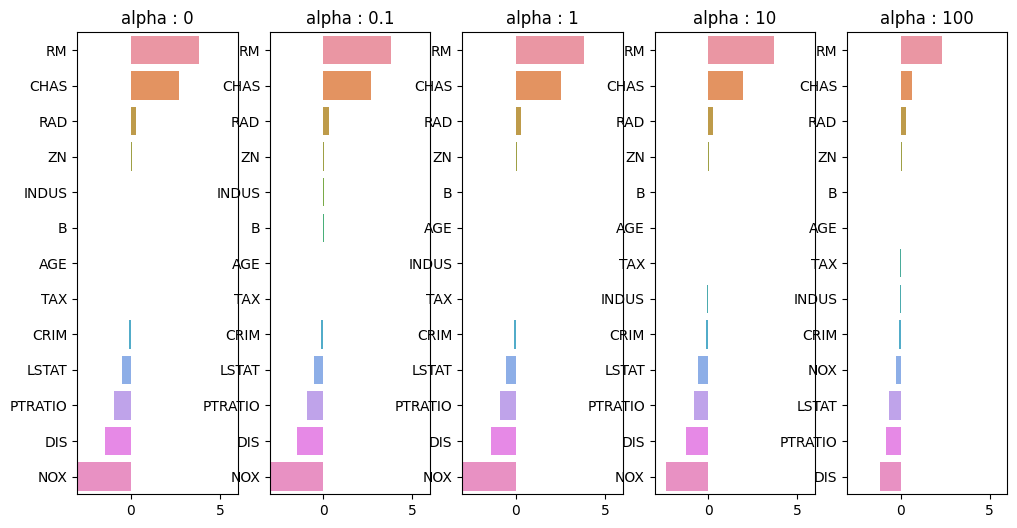

In [10]:
fig, axs = plt.subplots(figsize=(12, 6), nrows=1, ncols=5)
coef_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    coef = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha : ' + str(alpha)
    coef_df[colname] = coef
    coef = coef.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coef.values, y=coef.index, ax=axs[pos])
plt.show()

In [11]:
coef_df

,alpha : 0,alpha : 0.1,alpha : 1,alpha : 10,alpha : 100
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
NOX,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847
RM,3.809865,3.818233,3.854000,3.702272,2.334536
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
DIS,-1.475567,-1.459626,-1.372654,-1.248808,-1.153390
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856


## (2) 라쏘 (Lasso) 회귀
- 회귀 계수의 절대값에 패널티를 부여하는 L1규제를 선형 회귀에 적용한 것
- 영향력이 크지 않은 회귀 계수를 0으로 변환하고 제거
- 적절한 피처만 회귀에 포함시키는 피처 선택의 특성

- 사이킷런의 Lasso 클래스를 이용해서 라쏘 회귀 구현
- 주요 생성 파라미터 alpha : 라소 회귀의 alpha L1 규제 계수 해당    

In [12]:
# 라쏘 모델 생성/학습/예측
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

Lasso(alpha=10)

In [13]:
# 평가 
get_reg_eval(y_test, y_pred)

MSE : 33.030215
RMSE : 5.747192
R2 : 0.536399


In [14]:
# 교차 검증 수행
neg_mse = cross_val_score(lasso, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
mse = -1*neg_mse
print('MSE : ', mse.round(2))
print('RMSE : ', np.sqrt(mse).round(2))
print('Average of RMSE : ', np.mean(np.sqrt(mse)).round(2))

MSE :  [27.79 46.4  80.32 61.56 16.3 ]
RMSE :  [5.27 6.81 8.96 7.85 4.04]
Average of RMSE :  6.59


In [15]:
# alpha 값을 [0.07, 0.1, 0.5, 1, 3] 으로 변경하면서 
# RMSE와 회귀 계수 값의 변화 측정
alphas = [0.07, 0.1, 0.5, 1, 3]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    neg_mse = cross_val_score(lasso, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    mse = -1*neg_mse
    print('Alpha : ', alpha)
    print('MSE : ', mse.round(2))
    print('RMSE : ', np.sqrt(mse).round(2))
    print('Average of RMSE : ', np.mean(np.sqrt(mse)).round(2))
    print('------------------------------------------')

Alpha :  0.07
MSE :  [11.17 24.38 28.54 80.49 29.9 ]
RMSE :  [3.34 4.94 5.34 8.97 5.47]
Average of RMSE :  5.61
------------------------------------------
Alpha :  0.1
MSE :  [11.22 24.35 29.43 79.37 29.79]
RMSE :  [3.35 4.93 5.42 8.91 5.46]
Average of RMSE :  5.62
------------------------------------------
Alpha :  0.5
MSE :  [12.47 27.59 42.25 67.2  23.66]
RMSE :  [3.53 5.25 6.5  8.2  4.86]
Average of RMSE :  5.67
------------------------------------------
Alpha :  1
MSE :  [15.14 33.33 53.29 56.6  19.29]
RMSE :  [3.89 5.77 7.3  7.52 4.39]
Average of RMSE :  5.78
------------------------------------------
Alpha :  3
MSE :  [22.75 36.89 71.6  52.54 19.27]
RMSE :  [4.77 6.07 8.46 7.25 4.39]
Average of RMSE :  6.19
------------------------------------------


Lasso(alpha=0.07)

Text(0.5, 1.0, 'alpha : 0.07')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 0.07'}>

Lasso(alpha=0.1)

Text(0.5, 1.0, 'alpha : 0.1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 0.1'}>

Lasso(alpha=0.5)

Text(0.5, 1.0, 'alpha : 0.5')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 0.5'}>

Lasso(alpha=1)

Text(0.5, 1.0, 'alpha : 1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 1'}>

Lasso(alpha=3)

Text(0.5, 1.0, 'alpha : 3')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 3'}>

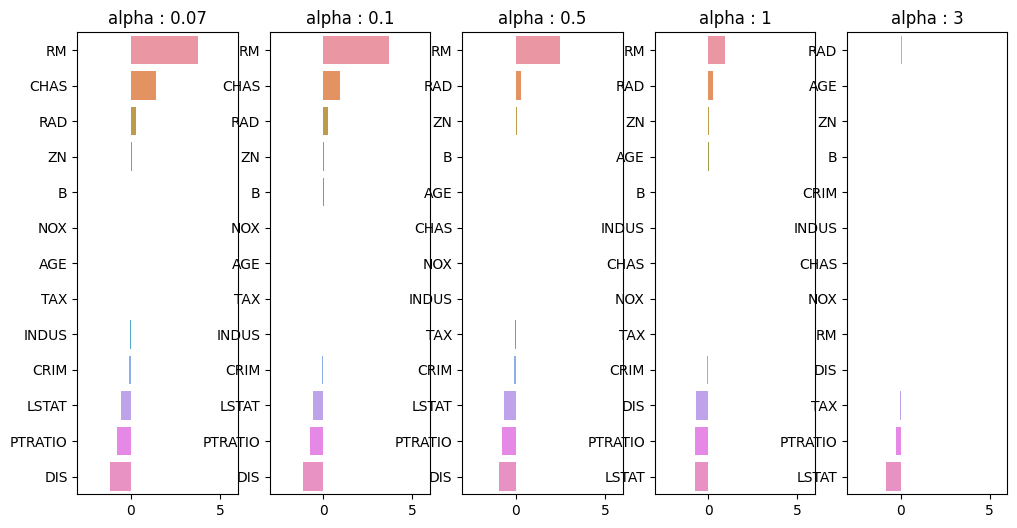

In [16]:
# 각 alpha에 따른 회귀 계수 값을 시각화
fig, axs = plt.subplots(figsize=(12, 6), nrows=1, ncols=5)
coef_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_data, y_target)
    coef = pd.Series(data=lasso.coef_, index=X_data.columns)
    colname = 'alpha : ' + str(alpha)
    coef_df[colname] = coef
    coef = coef.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coef.values, y=coef.index, ax=axs[pos])
plt.show()

In [17]:
# alpha 값에 다른 칼럼별 회귀 계수 출력
coef_df

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


###### 

## (3)  엘라스틱 넷(Elastic Net) 회귀

- 급격한 회귀 계수 변동을 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것
- 단점 : L1과 L2를 결합한 규제로 수행 시간이 상대적으로 오래 걸린다는 것
- 사이킷런의 ElasticNet 클래스 사용
- 주요 파라미터 : alpha와 l1_ratio
- ElasticNet 클래스의 alpha는 Ridge와 Lasso 클래스의 alpha 값과 다름

엘라스틱 규제 : aL1 + bL2  
- a : L1 규제의 alpha 값  
- b : L2 규제의 alpha 값  
- ElasticNet 클래스의 alpha : a + b  
- ---    
- l1_ratio : a / (a + b)  
- l1_ratio가 0이면 a가 0이 되어 L2 규제와 동일  
- l1_ratio가 1이면 b가 0이 되어 L1규제와 동일  

In [18]:
# ElasticNet 모델 생성/학습/예측
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=10)
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)

ElasticNet(alpha=10)

In [19]:
# 평가 
get_reg_eval(y_test, y_pred)

MSE : 32.604336
RMSE : 5.710021
R2 : 0.542377


In [20]:
# 교차 검증 수행
neg_mse = cross_val_score(elastic, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
mse = -1*neg_mse
print('MSE : ', mse.round(2))
print('RMSE : ', np.sqrt(mse).round(2))
print('Average of RMSE : ', np.mean(np.sqrt(mse)).round(2))

MSE :  [26.39 43.13 77.93 60.01 16.65]
RMSE :  [5.14 6.57 8.83 7.75 4.08]
Average of RMSE :  6.47


In [25]:
# alpha 값을 [0.07, 0.1, 0.5, 1, 3] 으로 변경하면서 
# RMSE와 회귀 계수 값의 변화 측정
alphas = [0.07, 0.1, 0.5, 1, 3]

for alpha in alphas:
    elastic = ElasticNet(alpha=alpha)
    neg_mse = cross_val_score(elastic, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    mse = -1*neg_mse
    print('Alpha : ', alpha)
    print('MSE : ', mse.round(2))
    print('RMSE : ', np.sqrt(mse).round(2))
    print('Average of RMSE : ', np.mean(np.sqrt(mse)).round(2))
    print('------------------------------------------')

Alpha :  0.07
MSE :  [11.52 24.75 29.28 72.   27.58]
RMSE :  [3.39 4.97 5.41 8.49 5.25]
Average of RMSE :  5.5
------------------------------------------
Alpha :  0.1
MSE :  [11.68 25.05 30.3  68.93 26.65]
RMSE :  [3.42 5.01 5.5  8.3  5.16]
Average of RMSE :  5.48
------------------------------------------
Alpha :  0.5
MSE :  [13.38 28.38 39.99 51.42 21.01]
RMSE :  [3.66 5.33 6.32 7.17 4.58]
Average of RMSE :  5.41
------------------------------------------
Alpha :  1
MSE :  [14.84 30.71 47.79 47.47 19.45]
RMSE :  [3.85 5.54 6.91 6.89 4.41]
Average of RMSE :  5.52
------------------------------------------
Alpha :  3
MSE :  [19.82 34.87 64.5  49.59 18.82]
RMSE :  [4.45 5.9  8.03 7.04 4.34]
Average of RMSE :  5.95
------------------------------------------


ElasticNet(alpha=0.07)

Text(0.5, 1.0, 'alpha : 0.07')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 0.07'}>

ElasticNet(alpha=0.1)

Text(0.5, 1.0, 'alpha : 0.1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 0.1'}>

ElasticNet(alpha=0.5)

Text(0.5, 1.0, 'alpha : 0.5')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 0.5'}>

ElasticNet(alpha=1)

Text(0.5, 1.0, 'alpha : 1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 1'}>

ElasticNet(alpha=3)

Text(0.5, 1.0, 'alpha : 3')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 3'}>

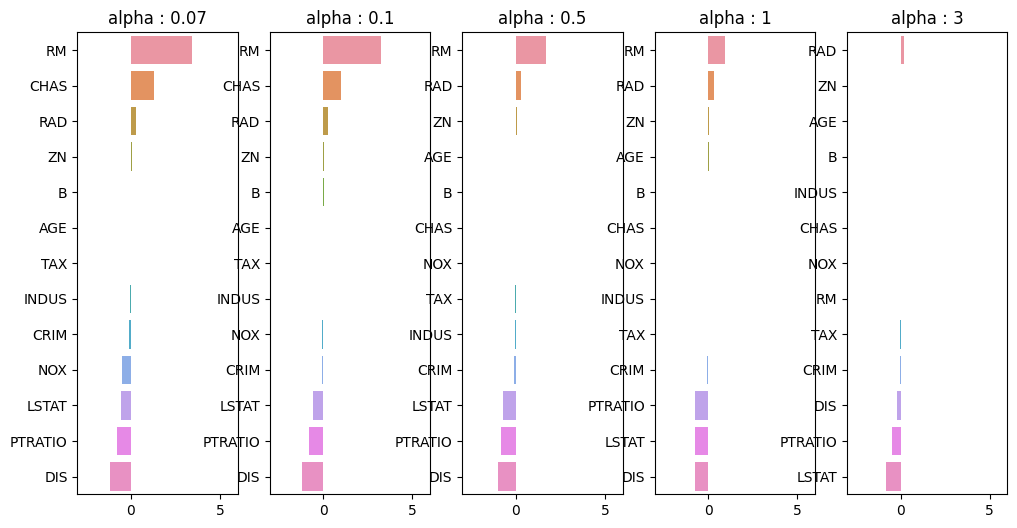

In [26]:
# 각 alpha에 따른 회귀 계수 값을 시각화
fig, axs = plt.subplots(figsize=(12, 6), nrows=1, ncols=5)
coef_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    elastic = ElasticNet(alpha=alpha)
    elastic.fit(X_data, y_target)
    coef = pd.Series(data=elastic.coef_, index=X_data.columns)
    colname = 'alpha : ' + str(alpha)
    coef_df[colname] = coef
    coef = coef.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coef.values, y=coef.index, ax=axs[pos])
plt.show()

In [27]:
# alpha 값에 다른 칼럼별 회귀 계수 출력
coef_df

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
CRIM,-0.100331,-0.100079,-0.092503,-0.080371,-0.040903
ZN,0.050678,0.051377,0.054045,0.053240,0.046018
INDUS,-0.045733,-0.045901,-0.031702,-0.012657,-0.000000
CHAS,1.287475,0.987970,0.000000,0.000000,0.000000
NOX,-0.484864,-0.059533,-0.000000,-0.000000,-0.000000
RM,3.445833,3.252662,1.723610,0.933936,0.000000
AGE,-0.008997,-0.007219,0.009475,0.020579,0.038926
DIS,-1.199548,-1.181402,-0.989655,-0.762044,-0.224409
RAD,0.284007,0.288726,0.311583,0.301569,0.199147
TAX,-0.014636,-0.014952,-0.016300,-0.016439,-0.013587


### 릿지, 라쏘, 엘라스틱넷 회귀 결론

규제 선형 회귀의 가장 대표적인 기법인 릿지, 라쏘, 엘라스틱넷 회귀 결론
- 어떤 것이 가장 좋은지는 상황에 따라 다름
- 각 알고리즘에서 하이퍼 파라미터를 변경해 가면서
- 최적의 예측 성능을 찾아내야 함

- 그러나 선형 회귀의 경우 최적의 하이퍼 파라미터를 찾아내는 것 못지 않게
- 먼제 데이터 분포도의 정규화와 인코딩 방법이 매우 중요함